**Assignment 7:** Compare Activation Functions.

*Explanation:* Experiment with ReLU, Sigmoid, and LeakyReLU and track model performance.


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

📌 Training model with RELU activation...
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 52ms/step - accuracy: 0.8658 - loss: 0.5076 - val_accuracy: 0.9742 - val_loss: 0.0853
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - accuracy: 0.9764 - loss: 0.0814 - val_accuracy: 0.9789 - val_loss: 0.0634
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.9834 - loss: 0.0559 - val_accuracy: 0.9816 - val_loss: 0.0552
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 46ms/step - accuracy: 0.9880 - loss: 0.0405 - val_accuracy: 0.9818 - val_loss: 0.0523
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 49ms/step - accuracy: 0.9906 - loss: 0.0309 - val_accuracy: 0.9841 - val_loss: 0.0466

📌 Training model with SIGMOID activation...
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 57ms/step - accuracy: 0.1055 - loss: 2.3477 - val_accuracy: 0.2158 - val_loss: 2.2389
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.2095 - loss: 2.2056 -

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 51ms/step - accuracy: 0.8685 - loss: 0.4755 - val_accuracy: 0.9753 - val_loss: 0.0889
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - accuracy: 0.9763 - loss: 0.0825 - val_accuracy: 0.9801 - val_loss: 0.0600
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step - accuracy: 0.9835 - loss: 0.0568 - val_accuracy: 0.9819 - val_loss: 0.0548
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - accuracy: 0.9867 - loss: 0.0432 - val_accuracy: 0.9832 - val_loss: 0.0501
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.9904 - loss: 0.0332 - val_accuracy: 0.9848 - val_loss: 0.0478


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


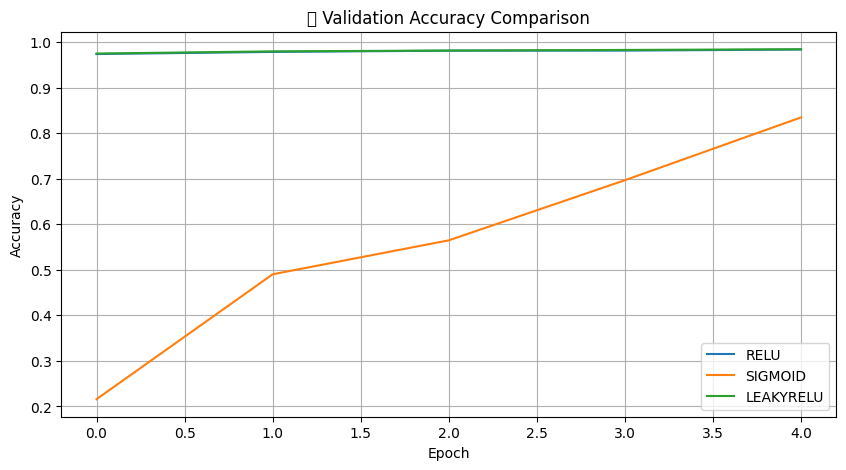

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


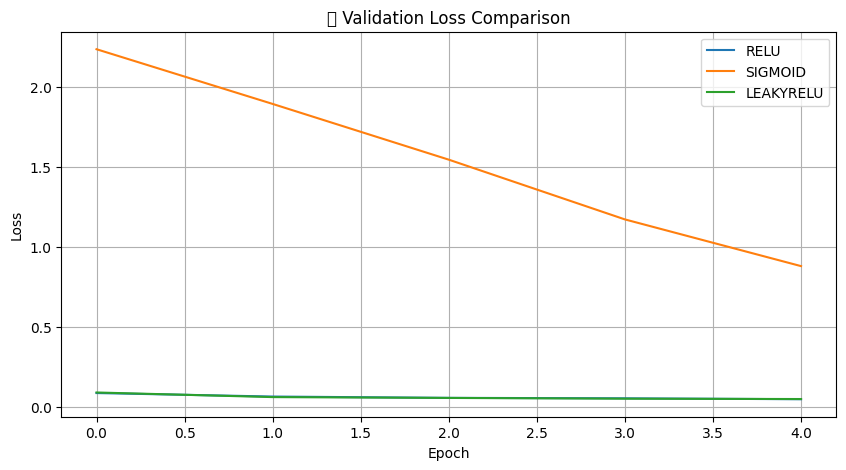

In [ ]:
# Step 1: Import Required Libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, LeakyReLU
import matplotlib.pyplot as plt

# Step 2: Load and Preprocess the MNIST Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values and reshape
x_train = x_train.reshape(-1,28,28,1).astype('float32') / 255.0
x_test = x_test.reshape(-1,28,28,1).astype('float32') / 255.0

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 3: Function to Build CNN Model with Given Activation
def build_model(activation_type):
    model = Sequential()

    # Input layer
    model.add(Input(shape=(28, 28, 1)))

    # Conv layer
    model.add(Conv2D(32, (3,3)))
    if activation_type == 'leakyrelu':
        model.add(LeakyReLU(alpha=0.1))
    else:
        model.add(tf.keras.layers.Activation(activation_type))

    # Pooling + Dense layers
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())
    model.add(Dense(64))
    if activation_type == 'leakyrelu':
        model.add(LeakyReLU(alpha=0.3))
    else:
        model.add(tf.keras.layers.Activation(activation_type))

    # Output layer
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and Compare Models
activations = ['relu', 'sigmoid', 'leakyrelu']
histories = {}

for act in activations:
    print(f"\n📌 Training model with {act.upper()} activation...")
    model = build_model(act)
    history = model.fit(x_train, y_train, epochs=5, batch_size=128,
                        validation_data=(x_test, y_test), verbose=1)
    histories[act] = history

# Step 5: Plot Validation Accuracy Comparison
plt.figure(figsize=(10, 5))
for act in activations:
    plt.plot(histories[act].history['val_accuracy'], label=act.upper())
plt.title("📊 Validation Accuracy Comparison")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Plot Validation Loss Comparison
plt.figure(figsize=(10, 5))
for act in activations:
    plt.plot(histories[act].history['val_loss'], label=act.upper())
plt.title("📉 Validation Loss Comparison")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()
